# Data exploration - Proyecto integrador

Este notebook contiene la exploración de datos desde la optica de exploracion de outliers de los datos utilizando metrica de Cooks, reducción de dimensionalidad a partir de los datos, y la estructuración final de la base de datos con la que se va a entrenar el modelo de sentiemientos.

Los estudiantes que participaron en el desarrollo de este proyecto son:
    
    1. Jorge Luis Renteria
    2. Edgar Leandro Jimenez
    3. Jesus Alberto Arcia
    
Universidad Eafit, 2019.

### Importacion de librerias necesarias

In [16]:
from yellowbrick.regressor import CooksDistance
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.decomposition import PCA

### Carga de datos

In [5]:
df= pd.read_csv('file:///D:/JRENTERI/Documents/Jorge Renteria/Maestria/Proyecto integrador/bow_4_dataset/bow_4_dataset/bow_100.csv')
df=df[df['label']<20]
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,6121,6122,6123,6124,6125,6126,6127,6128,6129,label
0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.130454,0.130454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.000000,0.098873,0.098873,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0.0,0.605844,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.0,0.000000,0.000000,0.228969,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

### Instancia del modelo y ajuste

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:157: RuntimeWarning: invalid value encountered in sqrt
  residuals_studentized = residuals / np.sqrt(mse) / np.sqrt(1 - leverage)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<bound method Visualizer.show of CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0B2E0D2B0>,
       draw_threshold=True, linefmt='C0-', markerfmt=',')>

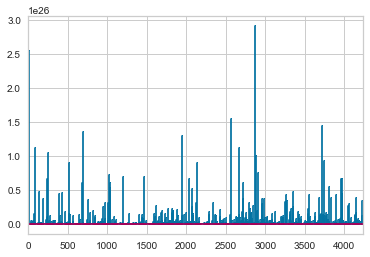

In [6]:
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show

In [9]:
df['Distancia']=visualizer.distance_
df.head()
Z=df[df['Distancia']>=1]
df2=df[df['Distancia']>=1].iloc[:,1:-1]
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,6121,6122,6123,6124,6125,6126,6127,6128,6129,label
1,0.000000,0.0,0.098873,0.098873,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.158298,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.217423,0.000000,0.222732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,0.000000,0.0,0.120845,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
28,0.079149,0.0,0.000000,0.000000,0.0,0.0,0.0,0.130454,0.130454,0.133639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


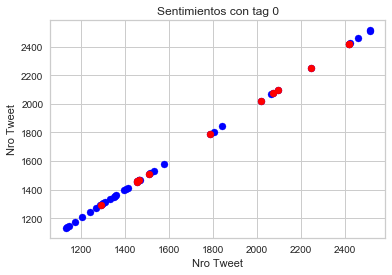

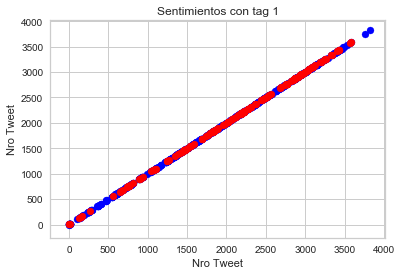

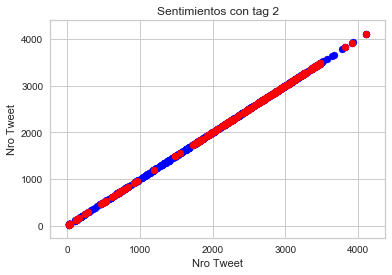

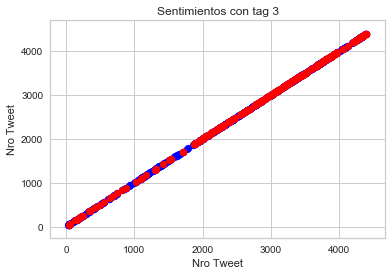

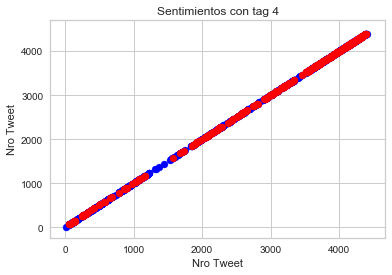

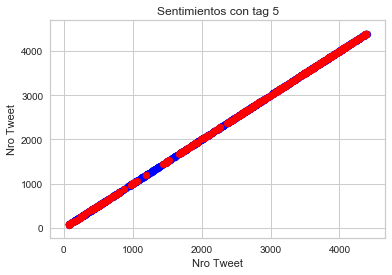

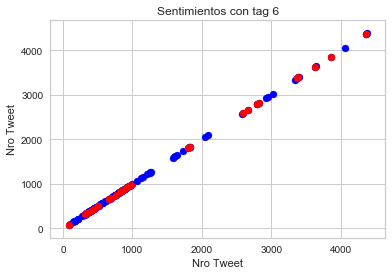

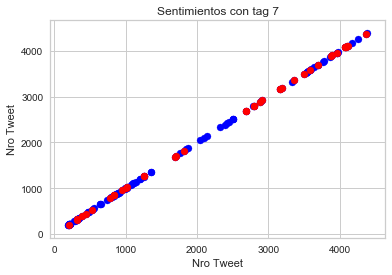

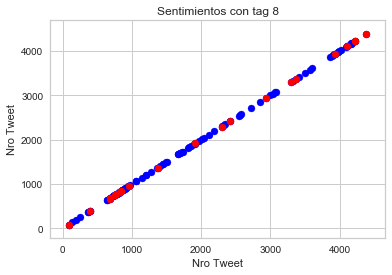

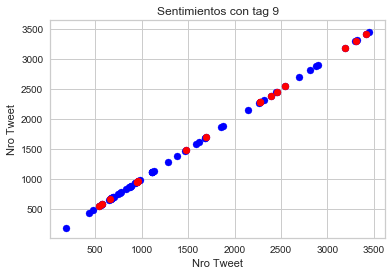

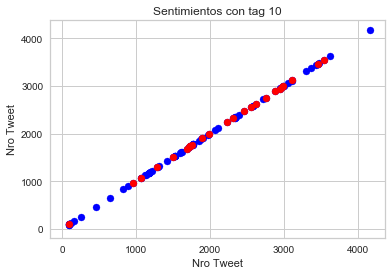

In [8]:
for i in range(11):
    plt.scatter(df[df['label']==i].iloc[:,0], df[df['label']==i].iloc[:,0], color='blue')
    plt.scatter(Z[Z['label']==i].iloc[:,0], Z[Z['label']==i].iloc[:,0], color='red')
    plt.xlabel('Nro Tweet')
    plt.ylabel('Nro Tweet')
    plt.title('Sentimientos con tag '+str(i))
    plt.show()

### Matriz de covarianza

In [13]:
mcov=np.cov(df2)
mcov

array([[0.00040377, 0.00016215, 0.0001623 , ..., 0.00065495, 0.00049323,
        0.0004907 ],
       [0.00016215, 0.00060611, 0.00016236, ..., 0.00065112, 0.00048829,
        0.00048809],
       [0.0001623 , 0.00016236, 0.00039883, ..., 0.00065134, 0.00050352,
        0.0004883 ],
       ...,
       [0.00065495, 0.00065112, 0.00065134, ..., 0.00284036, 0.00195589,
        0.00197025],
       [0.00049323, 0.00048829, 0.00050352, ..., 0.00195589, 0.00189638,
        0.00149286],
       [0.0004907 , 0.00048809, 0.0004883 , ..., 0.00197025, 0.00149286,
        0.00184867]])

In [14]:
np.linalg.det(mcov)

0.0

Implica que no hay solución única, por lo tanto, no existe una regla general que permita clasificar directamente todos los elementos, por ello, es un buen escenario para generar un modelo de analisis analítico

In [17]:
PCA(mcov)

PCA(copy=True, iterated_power='auto',
  n_components=array([[0.0004 , 0.00016, ..., 0.00049, 0.00049],
       [0.00016, 0.00061, ..., 0.00049, 0.00049],
       ...,
       [0.00049, 0.00049, ..., 0.0019 , 0.00149],
       [0.00049, 0.00049, ..., 0.00149, 0.00185]]),
  random_state=None, svd_solver='auto', tol=0.0, whiten=False)

No hay una diferenciación suficiente en el tiempo de computación,por lo tanto, no consideramos necesario eliminar información para optimizar el desgaste técnico

### Exportamos a csv para guardar en nube

In [ ]:
df2.to_csv(r'D:\JRENTERI\Documents\Jorge Renteria\Maestria\Proyecto integrador\DataSet\Dataset finales\Bow_sinOutliers.csv')